# Importing Libraries

In [149]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as statistics

# Conncting to the API

In [150]:
client_credentials_manager = SpotifyClientCredentials(client_id='CLIENT ID', client_secret='SECRET ID')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [151]:
#Function to get track ID in the playlist
def getTrackIDs(playlist_id):
    ids = []
    playlist = sp.playlist(playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('37i9dQZF1DWUXSVcZljKtz')

In [18]:
print(len(ids))

50


In [152]:
#Function to get track metadata and features
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    # meta
    name = meta['name']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    valence= features[0]['valence']
    time_signature = features[0]['time_signature']

    track = [name, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, time_signature]
    return track

In [153]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name','length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
df.to_csv("spotify.csv", sep = ',')

# Exploring the Data

In [154]:
df.sample(5)

,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
11,Birthday Song,19,0.641,0.1210,0.641,0.555,0.000000,0.1210,-10.855,0.1120,76.492,0.785,4
10,Suzanna,40,0.796,0.3290,0.796,0.786,0.000003,0.1020,-5.702,0.0490,101.996,0.758,4
12,Pombe Sigara,30,0.701,0.2110,0.701,0.546,0.000624,0.0733,-12.320,0.1610,90.978,0.507,4
35,Sota,27,0.826,0.0563,0.826,0.792,0.000213,0.0580,-4.496,0.0515,100.012,0.432,4
40,"Avoid Those People ft. Boutross, Breeder LW, A...",33,0.841,0.4560,0.841,0.635,0.000000,0.0524,-6.446,0.3580,141.897,0.643,4


In [155]:
df.duplicated().sum()

0

In [156]:
df.isnull().sum()

name                0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
dtype: int64

In [157]:
df.dtypes

name                 object
length                int64
popularity          float64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
time_signature        int64
dtype: object

In [158]:
df.drop("name", axis=1, inplace=True)
df.drop("popularity", axis=1, inplace=True)

# Visualization

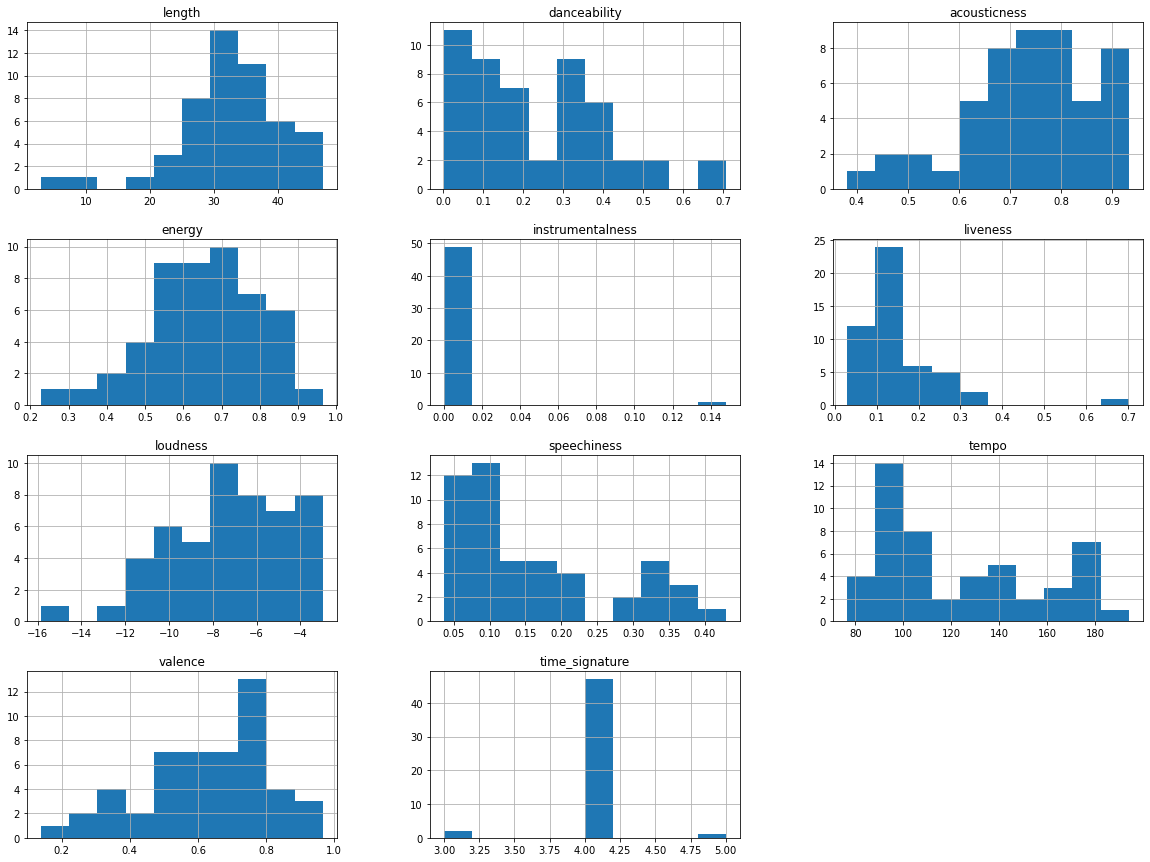

In [159]:
df.hist(figsize = (20,15))
plt.show()

In [160]:
df.mean()

length               32.240000
danceability          0.230671
acousticness          0.734380
energy                0.647800
instrumentalness      0.003143
liveness              0.149544
loudness             -7.168320
speechiness           0.161222
tempo               122.196380
valence               0.628900
time_signature        3.980000
dtype: float64

<AxesSubplot:>

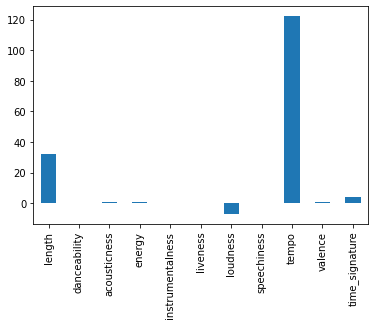

In [161]:
df.mean().plot(kind='bar')

Scaling down the dataset to provide better insight

In [162]:
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
#scaling the whole dataframe
scaler=MinMaxScaler()
scaler.fit(df)
scaled=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled, columns=df.columns)

<AxesSubplot:>

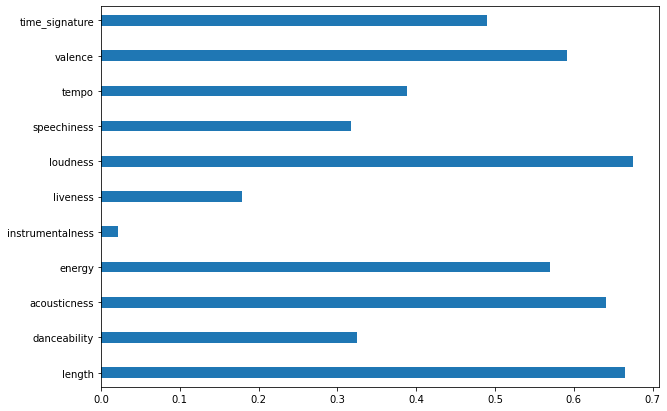

In [163]:
scaled_df.mean().plot(kind='barh',figsize = (10,7), width = 0.3)

<AxesSubplot:>

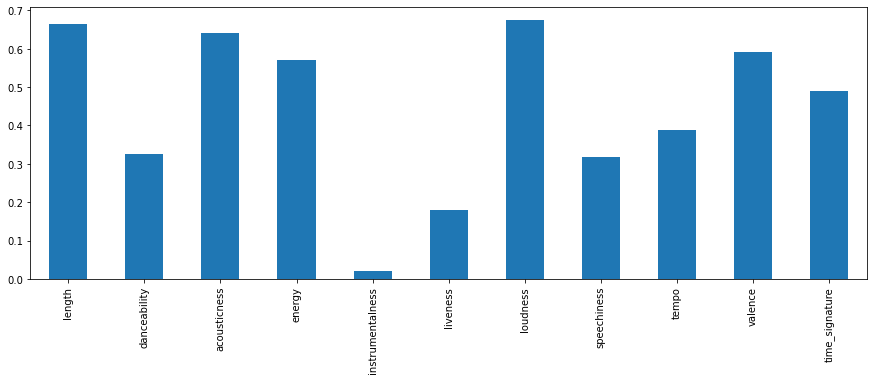

In [164]:
scaled_df.mean().plot(kind='bar',figsize = (15,5), width = 0.5)

Now to make a comparison with a single track on Spotify

I chose 'Dala Wa' by Mejja released on 21st October 2022 (6days ago)

In [165]:
#to get features of the Mejja song using the trackID
track_features=sp.audio_features('3vwCLR1fyjeMCkPFfnfnHL')
track_features

[{'danceability': 0.686,
  'energy': 0.689,
  'key': 2,
  'loudness': -5.251,
  'mode': 1,
  'speechiness': 0.188,
  'acousticness': 0.273,
  'instrumentalness': 0,
  'liveness': 0.0588,
  'valence': 0.419,
  'tempo': 102.056,
  'type': 'audio_features',
  'id': '3vwCLR1fyjeMCkPFfnfnHL',
  'uri': 'spotify:track:3vwCLR1fyjeMCkPFfnfnHL',
  'track_href': 'https://api.spotify.com/v1/tracks/3vwCLR1fyjeMCkPFfnfnHL',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3vwCLR1fyjeMCkPFfnfnHL',
  'duration_ms': 216471,
  'time_signature': 4}]

In [166]:
#to put the features in a pandas dataframe
single_track_df = pd.DataFrame(track_features, columns = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence','duration_ms', 'time_signature'])
single_track_df

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,0.686,0.273,0.689,0,0.0588,-5.251,0.188,102.056,0.419,216471,4


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(single_track_df)
scaled=scaler.fit_transform(single_track_df)
scaled_single_track_df=pd.DataFrame(scaled, columns=single_track_df.columns)
scaled_single_track_dfjm

V:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
V:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
V:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
V:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


NameError: name 'scaled_single_track_dfjm' is not defined